In [214]:
import numpy as np
import pandas as pd
import linearsolve as ls
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

## Exercise: The New-Keynesian Model with Optimal Monetary Policy

Consider the New-Keynesian model opptimal monetary policy:

\begin{align}
y_t & = E_t y_{t+1}  - \left( r_{t} - \bar{r}\right) + g_t\\
i_{t} & = r_{t} + E_t \pi_{t+1}\\
\pi_t & = \beta E_t\pi_{t+1}  + \kappa y_t+ u_t\\
\kappa\pi & = -\lambda y
\end{align}

where $\bar{y}$ and $\pi^T$ have been set to zero. We can interpret $y$ as the output gap (log difference of output from steady state). The system above has four equations and four endogenous variables: $y_t$, $\pi_t$, $i_t$, and $r_t$ ($u_t$ and $g_t$ are exogenous to the system).

### Exogenous Shocks and Parameters

As usual, the variables $g_t$ and $u_t$ represent exogenous shocks to aggregate demand and inflation. They follow AR(1) processes:

\begin{align}
g_{t+1} & = \rho_g g_{t} + \epsilon^g_{t+1}\\
u_{t+1} & = \rho_u u_{t} + \epsilon^u_{t+1}.
\end{align}

Use the following parameterization in the simulations below:

| $$\beta$$ | $$\bar{r}$$    | $$\kappa$$ | $$\rho_g$$ | $$\rho_u$$ | $$\lambda$$ |
|-----------|----------------|------------|------------|------------|-------------|
| 0.995     | $$-\log\beta$$ | 0.25       | 0.5        | 0.5        | 0.1         |

The shock covariance matrix for the model is:

\begin{align}
\text{Covariance matrix} & = \left[\begin{array}{cc}\sigma_g^2 & 0\\ 0 & \sigma_u^2\end{array}\right]
\end{align}

Use the following values for $\sigma_g$ and $\sigma_u$ in the simulations:

| $$\sigma_g$$ | $$\sigma_u$$ |
|--------------|--------------|
| 0.015        | 0.003        |

In [215]:
# Create a variable called 'parameters' that stores the model parameter values (except lambda) in a Pandas Series. PROVIDED
parameters = pd.Series({'beta':0.995,'r_bar':-np.log(0.995),'kappa':0.25,'rho_g':0.5,'rho_u':0.5})

# Add the value for lambda as 'lam' to 'parameters'
parameters['lam'] = 0.1

# Create variable called 'var_names' that stores the variable names in a list with exogenous state variables
# ordered first, endogenous state variables ordered second, and control variables ordered last.
var_names = ['g','u','y','pi','i','r']

# Create variable called 'shock_names' that stores an exogenous shock name for each exogenous state variable. PROVIDED
shock_names = ['e_g','e_u']

# Define a function that evaluates the equilibrium conditions of the model solved for zero. PROVIDED
def equilibrium_equations(variables_forward,variables_current,parameters):

    # Parameters. PROVIDED
    p = parameters

    # Current variables. PROVIDED
    cur = variables_current

    # Forward variables. PROVIDED
    fwd = variables_forward

    # IS equation.
    is_equation = fwd.y - (cur.r -p.r_bar) + cur.g - cur.y

    # Fisher_equation.
    fisher_equation = cur.r + fwd.pi - cur.i

    # Monetary policy. Variable name: 'monetary_policy'
    monetary_policy = p.lam*cur.y  + p.kappa*cur.pi

    # Phillips curve.
    phillips_curve = p.beta*fwd.pi + p.kappa*cur.y + cur.u - cur.pi

    # Demand process.
    demand_process = p.rho_g*cur.g - fwd.g

    # Inflation process.
    inflation_process = p.rho_u*cur.u - fwd.u

    # Stack equilibrium conditions into a numpy array. PROVIDED
    return np.array([is_equation,
                     fisher_equation,
                     monetary_policy,
                     phillips_curve,
                     demand_process,
                     inflation_process])


# Initialize the model into a variable named 'model'. PROVIDED
nk_model = ls.model(equations = equilibrium_equations,
                    n_states=2,
                    n_exo_states=2,
                    var_names=var_names,
                    shock_names=shock_names,
                    parameters = parameters)


# Compute the steady state numerically using .compute_ss() method of nk_model. PROVIDED
nk_model.compute_ss([0,0,0,0.01,0.01,0.01])

### Simulation with $\lambda = 0$

You will:

1. Compute a 401 period simulation of the model.
2. Construct a plot of simulated output and inflation.
3. Compute standard deviations of simulated output and inflation.

In [216]:
# Set the value for 'lam' in nk_model.parameters to 0
parameters['lam']=0

# Find the log-linear approximation around the non-stochastic steady state and solve using .approximate_and_solve() method of nk_model
# set argumement 'log_linear' to False because the model is already log-linear.
nk_model.approximate_and_solve(log_linear=False)


# Define variable 'sig_g' equal to the the standard deviation of sigma_g
sig_g=0.015

# Define variable 'sig_u' equal to the the standard deviation of sigma_u
sig_u=0.003

# Compute simulation
nk_model.stoch_sim(cov_mat = [[sig_g**2,0],[0,sig_u**2]],T=401,seed=126)


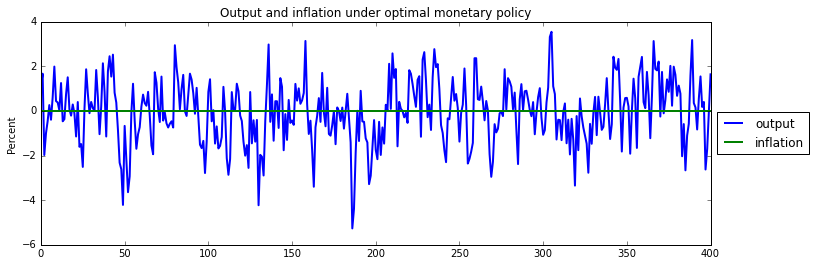

In [217]:
# Create a figure with dimensions 12x8. PROVIDED
fig = plt.figure(figsize=(12,4))

# Create axis. PROVIDED
ax = fig.add_subplot(1,1,1)

# Plot output (times 100)
ax.plot(nk_model.simulated['y']*100,lw=2,label='output')

# Plot inflation (times 400)
ax.plot(nk_model.simulated['pi']*400,lw=2,label='inflation')

# Set axis title
ax.set_title('Output and inflation under optimal monetary policy')

# Set y-axis label to "Percent"
ax.set_ylabel('Percent')

# Construct legends PROVIDED
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [218]:
# Print standard deviation of output (times 100)
(nk_model.simulated['y']*100).std()

1.4151683664708028

In [219]:
# print standard deviation of inflation (times 400)
(nk_model.simulated['pi']*400).std()

0.0

### Simulation with $\lambda = 1$

You will:

1. Compute a 401 period simulation of the model.
2. Construct a plot of simulated output and inflation.
3. Compute standard deviations of simulated output and inflation.

In [220]:
# Set the value for 'lam' in nk_model.parameters to 1
parameters['lam']=1

# Find the log-linear approximation around the non-stochastic steady state and solve using .approximate_and_solve() method of nk_model
# set argumement 'log_linear' to False because the model is already log-linear.
nk_model.approximate_and_solve(log_linear=False)


# Define variable 'sig_g' equal to the the standard deviation of sigma_g
sig_g=0.015

# Define variable 'sig_u' equal to the the standard deviation of sigma_u
sig_u=0.003

# Compute simulation
cov_mat=[[sig_g**2,0],[0,sig_u**2]]

nk_model.stoch_sim(cov_mat=cov_mat,T=401,seed=126)


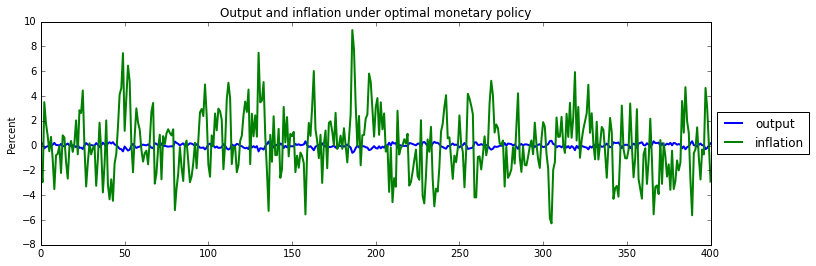

In [221]:
# Create a figure with dimensions 12x8. PROVIDED
fig = plt.figure(figsize=(12,4))

# Create axis. PROVIDED
ax = fig.add_subplot(1,1,1)

# Plot output (times 100)
ax.plot(nk_model.simulated['y']*100,lw=2,label='output')

# Plot inflation (times 400)
ax.plot(nk_model.simulated['pi']*400,lw=2,label='inflation')

# Set axis title
ax.set_title('Output and inflation under optimal monetary policy')

# Set y-axis label to "Percent"
ax.set_ylabel('Percent')


# Construct legends PROVIDED
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [222]:
# Print standard deviation of output (times 100)
(nk_model.simulated['y']*100).std()

0.1565451732821684

In [223]:
# print standard deviation of inflation (times 400)
(nk_model.simulated['pi']*400).std()

2.504722772514694

### Simulation with $\lambda = 10$

You will:

1. Compute a 401 period simulation of the model.
2. Construct a plot of simulated output and inflation.
3. Compute standard deviations of simulated output and inflation.

In [224]:
# Set the value for 'lam' in nk_model.parameters to 10
parameters['lam']=10

# Find the log-linear approximation around the non-stochastic steady state and solve using .approximate_and_solve() method of nk_model
# set argumement 'log_linear' to False because the model is already log-linear.
nk_model.approximate_and_solve(log_linear=False)

# Define variable 'sig_g' equal to the the standard deviation of sigma_g
sig_g=0.015

# Define variable 'sig_u' equal to the the standard deviation of sigma_u
sig_u=0.003

# Compute simulation
cov_mat=[[sig_g**2,0],[0,sig_u**2]]

nk_model.stoch_sim(cov_mat=cov_mat,T=401,seed=126)


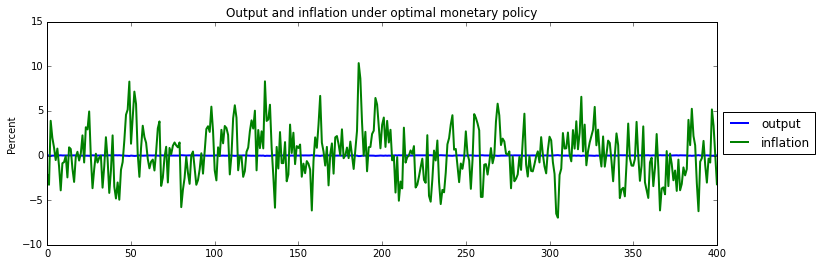

In [225]:
# Create a figure with dimensions 12x8. PROVIDED
fig = plt.figure(figsize=(12,4))

# Create axis. PROVIDED
ax = fig.add_subplot(1,1,1)

# Plot output (times 100)
ax.plot(nk_model.simulated['y']*100,lw=2,label='output')

# Plot inflation (times 400)
ax.plot(nk_model.simulated['pi']*400,lw=2,label='inflation')

# Set axis title
ax.set_title('Output and inflation under optimal monetary policy')

# Set y-axis label to "Percent"
ax.set_ylabel('Percent')

# Construct legends PROVIDED
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [226]:
# Print standard deviation of output (times 100)
(nk_model.simulated['y']*100).std()

0.01738536076745458

In [227]:
# print standard deviation of inflation (times 400)
(nk_model.simulated['pi']*400).std()

2.7816577227927346

**Questions**

1. In terms of a central bank's preference for stabilizing output and inflation, explain in words what it means for $\lambda$ to increase. 
2. Which value for $\lambda$ produced the smallest fluctuations in output?
3. Which value for $\lambda$ produced the smallest fluctuations in inflation?

**Answers**

1.  if $\lambda$ increases, the preference for output gap is more, and thus the needs for stablizing output and inflation is small


2.  when $\lambda$ =10


3.  when $\lambda$ =0

## Exercise: Optimal Monetary Policy v. Taylor's Rule

In this exercise, you will compute and compare impulse responses to supply and demand shocks for the new Keynesian model under two assumptions about monetary policy:

1. The central bank follows optimal monetary policy.
2. The central bank follows Taylor's simple rule.

### NK Model with Optimal Policy

The New-Keynesian model opptimal monetary policy:

\begin{align}
y_t & = E_t y_{t+1}  - \left( r_{t} - \bar{r}\right) + g_t\\
i_{t} & = r_{t} + E_t \pi_{t+1}\\
\pi_t & = \beta E_t\pi_{t+1}  + \kappa y_t+ u_t\\
\kappa\pi & = -\lambda y
\end{align}

The system above has four equations and four endogenous variables: $y_t$, $\pi_t$, $i_t$, and $r_t$ ($u_t$ and $g_t$ are exogenous to the system).

### Exogenous Shocks and Parameters

As usual, the variables $g_t$ and $u_t$ represent exogenous shocks to aggregate demand and inflation. They follow AR(1) processes:

\begin{align}
g_{t+1} & = \rho_g g_{t} + \epsilon^g_{t+1}\\
u_{t+1} & = \rho_u u_{t} + \epsilon^u_{t+1}.
\end{align}

Use the following parameterization in the simulations:

| $$\beta$$ | $$\bar{r}$$    | $$\kappa$$ | $$\rho_g$$ | $$\rho_u$$ | $$\lambda$$ |
|-----------|----------------|------------|------------|------------|-------------|
| 0.995     | $$-\log\beta$$ | 0.25       | 0.5        | 0.5        | 0.1         |

In [228]:
# Create a variable called 'parameters' that stores the model parameter values (except lambda) in a Pandas Series. PROVIDED
parameters = pd.Series({'beta':0.995,'r_bar':-np.log(0.995),'kappa':0.25,'rho_g':0.5,'rho_u':0.5})

# Add the value for lambda as 'lam' to 'parameters'
parameters['lam']=0.1

# Create variable called 'var_names' that stores the variable names in a list with exogenous state variables
# ordered first, endogenous state variables ordered second, and control variables ordered last.
var_names = ['g','u','y','pi','i','r']

# Create variable called 'shock_names' that stores an exogenous shock name for each exogenousn state variable. PROVIDED
shock_names = ['e_g','e_u']

# Define a function that evaluates the equilibrium conditions of the model solved for zero. PROVIDED
def equilibrium_equations(variables_forward,variables_current,parameters):

    # Parameters. PROVIDED
    p = parameters

    # Current variables. PROVIDED
    cur = variables_current

    # Forward variables. PROVIDED
    fwd = variables_forward

    # IS equation. PROVIDED
    is_equation = fwd.y - (cur.r -p.r_bar) + cur.g - cur.y

    # Fisher_equation. PROVIDED
    fisher_equation = cur.r + fwd.pi - cur.i

    # Monetary policy. Variable name: 'monetary_policy'
    monetary_policy = p.lam*cur.y  + p.kappa*cur.pi

    # Phillips curve. PROVIDED
    phillips_curve = p.beta*fwd.pi + p.kappa*cur.y + cur.u - cur.pi

    # Demand process. PROVIDED
    demand_process = p.rho_g*cur.g - fwd.g

    # Inflation process. PROVIDED
    inflation_process = p.rho_u*cur.u - fwd.u


    # Stack equilibrium conditions into a numpy array. PROVIDED
    return np.array([is_equation,fisher_equation,monetary_policy,phillips_curve,demand_process,inflation_process])


# Initialize the model into a variable named 'nk_model_optimal'. PROVIDED
nk_model_optimal = ls.model(equations = equilibrium_equations,n_states=2,n_exo_states=2,var_names=var_names,shock_names=shock_names,parameters = parameters)


# Compute the steady state numerically using .compute_ss() method of nk_model_optimal. PROVIDED
nk_model_optimal.compute_ss([0,0,0,0.01,0.01,0.01])

# Find the log-linear approximation around the non-stochastic steady state and solve using .approximate_and_solve() method of nk_model_optimal
# set argumement 'log_linear' to False because the model is already log-linear. PROVIDED
nk_model_optimal.approximate_and_solve(log_linear = False)


### NK Model with Taylor's Rule

The New-Keynesian model opptimal monetary policy:

\begin{align}
y_t & = E_t y_{t+1}  - \left( r_{t} - \bar{r}\right) + g_t\\
i_{t} & = r_{t} + E_t \pi_{t+1}\\
\pi_t & = \beta E_t\pi_{t+1}  + \kappa y_t+ u_t\\
i_{t} & = \bar{r} + \pi^T + \phi_{\pi}\big(\pi_t - \pi^T\big) + \phi_{y}\big(y_t - \bar{y}\big)
\end{align}

The system above has four equations and four endogenous variables: $y_t$, $\pi_t$, $i_t$, and $r_t$ ($u_t$ and $g_t$ are exogenous to the system).

### Exogenous Shocks and Parameters

As usual, the variables $g_t$ and $u_t$ represent exogenous shocks to aggregate demand and inflation. They follow AR(1) processes:

\begin{align}
g_{t+1} & = \rho_g g_{t} + \epsilon^g_{t+1}\\
u_{t+1} & = \rho_u u_{t} + \epsilon^u_{t+1}.
\end{align}

Use the following parameterization in the simulations:

| $$\beta$$ | $$\bar{r}$$    | $$\kappa$$ | $$\rho_g$$ | $$\rho_u$$ | $$\pi^T$$ | $$\phi_{\pi}$$ | $\phi_{y}$ | $$\bar{y}$$ |
|-----------|----------------|------------|------------|------------|-----------|----------------|------------|-------------------|
| 0.995     | $$-\log\beta$$ | 0.25       | 0.5        | 0.5        | 0.02/4    | 1.5            | 0.5/4      | 0                 |

In [233]:
# Create a variable called 'parameters' that stores the model parameter values (except lambda) in a Pandas Series. PROVIDED
parameters = pd.Series({'beta':0.995,'r_bar':-np.log(0.995),'kappa':0.25,'rho_g':0.5,'rho_u':0.5})

# Add the value for 'pi_T' to 'parameters'
parameters['pi_T']=0.02/4

# Add the value for 'phi_pi' to 'parameters'
parameters['phi_pi']=1.5

# Add the value for 'phi_y' to 'parameters'
parameters['phi_y']=0.5/4

# Create variable called 'var_names' that stores the variable names in a list with exogenous state variables
# ordered first, endogenous state variables ordered second, and control variables ordered last.
var_names = ['g','u','y','pi','i','r']

# Create variable called 'shock_names' that stores an exogenous shock name for each exogenous state variable. PROVIDED
shock_names = ['e_g','e_u']

# Define a function that evaluates the equilibrium conditions of the model solved for zero. PROVIDED
def equilibrium_equations(variables_forward,variables_current,parameters):

    # Parameters. PROVIDED
    p = parameters

    # Current variables. PROVIDED
    cur = variables_current

    # Forward variables. PROVIDED
    fwd = variables_forward

    # IS equation. . PROVIDED
    is_equation = fwd.y - (cur.r -p.r_bar) + cur.g - cur.y

    # Fisher_equation. . PROVIDED
    fisher_equation = cur.r + fwd.pi - cur.i

    # Monetary policy. Variable name: 'monetary_policy'
    monetary_policy = p.r_bar + p.pi_T + p.phi_pi*(cur.pi - p.pi_T) + p.phi_y*cur.y-cur.i

    # Phillips curve. . PROVIDED
    phillips_curve = p.beta*fwd.pi + p.kappa*cur.y + cur.u - cur.pi

    # Demand process. . PROVIDED
    demand_process = p.rho_g*cur.g - fwd.g

    # Inflation process. . PROVIDED
    inflation_process = p.rho_u*cur.u - fwd.u


    # Stack equilibrium conditions into a numpy array. PROVIDED
    return np.array([is_equation,fisher_equation,monetary_policy,phillips_curve,demand_process,inflation_process])


# Initialize the model into a variable named 'nk_model_taylor'. PROVIDED
nk_model_taylor = ls.model(equations = equilibrium_equations,n_states=2,n_exo_states=2,var_names=var_names,shock_names=shock_names,parameters = parameters)


# Compute the steady state numerically using .compute_ss() method of nk_model_taylor. PROVIDED
nk_model_taylor.compute_ss([0,0,0,0.01,0.01,0.01])

# Find the log-linear approximation around the non-stochastic steady state and solve using .approximate_and_solve() method of nk_model_taylor
# set argumement 'log_linear' to False because the model is already log-linear. PROVIDED
nk_model_taylor.approximate_and_solve(log_linear = False)


### Impulse Responses

Compute a 21 period impulse responses of the each model's variables to a 0.01 unit shock to the exogenous component of  demand ($g_t$) and a 0.01/4 unit shock to the exogenous component of inflation ($u_t$) in period 5.

In [234]:
# Compute the desired impulse responses for the model with optimal monetary policy 
nk_model_optimal.impulse(shocks=[0.01,0.01/4],T=21,t0=5)
# Compute the desired impulse responses for the model with Taylor's rule
nk_model_taylor.impulse(shocks=[0.01,0.01/4],T=21,t0=5)

#### Demand Shock

Plot the impulse responses of output and inflation to the demand shock under each monetary policy specification. Multiply output by 100 and multiply inflation by 400 (to annualize the values).

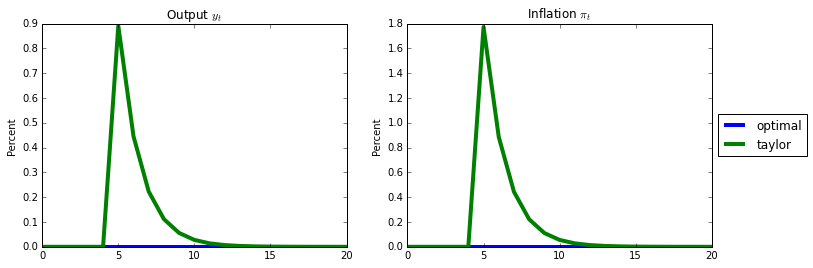

In [239]:
# Create figure. PROVIDED
fig = plt.figure(figsize=(12,4))

# Create left subplot. PROVIDED
ax1 = fig.add_subplot(1,2,1)
# Create right subplot. PROVIDED
ax2 = fig.add_subplot(1,2,2)

# Left subplot title. PROVIDED
ax1.set_title('Output $y_t$')
# Right subplot title. PROVIDED
ax2.set_title('Inflation $\pi_t$')

# Left subplot y-axis label. PROVIDED
ax1.set_ylabel('Percent')
# Right subplot y-axis label. PROVIDED
ax2.set_ylabel('Percent')

# Plot output (multiplied by 100) under both monetary policies on right axis.
ax1.plot(nk_model_optimal.irs['e_g']['y']*100,lw=4)
ax1.plot(nk_model_taylor.irs['e_g']['y']*100,lw=4)

# Plot inflation (multiplied by 400) under both monetary policies on right axis. Add labels for the lines.
ax2.plot(nk_model_optimal.irs['e_g']['pi']*400,lw=4)
ax2.plot(nk_model_taylor.irs['e_g']['pi']*400,lw=4)

# Construct legends PROVIDED
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=('optimal','taylor'));

#### Inflation Shock

Plot the impulse responses of output and inflation to the inflation shock under each monetary policy specification. Multiply output by 100 and multiply inflation by 400 (to annualize the values).

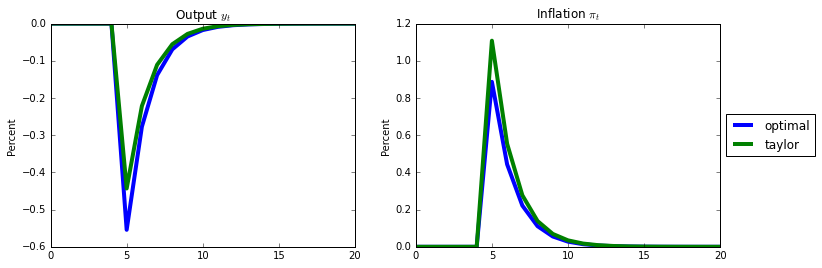

In [240]:
# Create figure. PROVIDED
fig = plt.figure(figsize=(12,4))

# Create left subplot. PROVIDED
ax1 = fig.add_subplot(1,2,1)
# Create right subplot. PROVIDED
ax2 = fig.add_subplot(1,2,2)

# Left subplot title. PROVIDED
ax1.set_title('Output $y_t$')
# Right subplot title. PROVIDED
ax2.set_title('Inflation $\pi_t$')

# Left subplot y-axis label. PROVIDED
ax1.set_ylabel('Percent')
# Right subplot y-axis label. PROVIDED
ax2.set_ylabel('Percent')

# Plot output (multiplied by 100) under both monetary policies on left axis.
# Plot output on left axis
ax1.plot(nk_model_optimal.irs['e_u']['y']*100,lw=4)
ax1.plot(nk_model_taylor.irs['e_u']['y']*100,lw=4)


# Plot inflation (multiplied by 400) under both monetary policies on right axis. Add labels for the lines.
ax2.plot(nk_model_optimal.irs['e_u']['pi']*400,lw=4)
ax2.plot(nk_model_taylor.irs['e_u']['pi']*400,lw=4)

# Construct legends PROVIDED
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5),labels=('optimal','taylor'));


**Questions**

1. Does Taylor's rule appear to do a better job matching the optimal response to demand or inflation shocks? Explain


**Answers**

1. Yes， Taylor's rule appear to do a better job matching the optimal response to demand or inflation shocks since it less tradeoff between output and inflation